# <center>Rozwiązywanie układów równań</center>

Instrukcja:
Na zajęciach należy wykonać poniższe zadania, a następnie sporządzić sprawozdanie zawierające odpowiedzi (w postaci kodu) z komentarzami w środowisku Jupyter Notebook i umieścić je na platformie e-learningowej.   

In [20]:
import main
import scipy as sp
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import timeit
%load_ext memory_profiler

The memory_profiler extension is already loaded. To reload it, use:
  %reload_ext memory_profiler


**Cel zajęć:** Celem zajęć jest zapoznanie się z numerycznymi metodami rozwiązywania układów równań liniowych w postaci macierzowej, z rzadkimi macierzami prostokątnymi. Czyli dana jest macierz $\mathbf{A}$ prostokątna o wymiarach ($m\times n$) i [rzadka](https://pl.wikipedia.org/wiki/Macierz_rzadka) oraz wektor $\mathbf{b}$ ($m\times 1$), należy rozwiązać układ równań postaci:    
$
\mathbf{Ax}=\mathbf{b}
$ 
  
gdzie $\mathbf{A}$ to macierz współczynników z lewej strony równania, wektor $\mathbf{x}$ jest wektorem zmiennych a wektor $\mathbf{b}$ wyników prawej strony równania.  

Do oceny jakości rozwiązania będziemy wykorzystywać residuum (ang. *residual*)
$
\mathbf{r}=\mathbf{b}-\mathbf{Ax}
$ 
  

***Zadanie 1***   
Dane jest $m = 50$ oraz $n = 12$. Zdefiniuję funkcję *spare_matrixAbt*, która zwróci:
- wektor $\mathbf{t}$ typu $m\times 1$ za pomocą komendy linspace tak aby wartości tego wektora należay do przedzaiłu $[0,1]$,
- wektor $\mathbf{b}$ typu $m \times 1$, którego wartości dane są funkcją $\cos(4t)$ oraz
- macierz $\mathbf{A}$ postaci: 
$$
\left[\begin{matrix}
1 & t_0 & t_{0}^{2} & \cdots & t_{0}^{n-1} \\
1 & t_1 & t_{1}^{2} & \cdots & t_{1}^{n-1} \\
1 & t_2 & t_{2}^{2} & \cdots & t_{2}^{n-1} \\
\vdots & \cdots & \ddots & \cdots & \vdots \\
1 & t_{m-1} & t_{m-1}^{2} & \cdots & t_{m-1}^{n-1} 
\end{matrix}\right]
$$  
  
**Wskazówka**: Do definicji macierzy $\mathbf{A}$ należy użyć funkcji [vander](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.vander.html) oraz [fliplr](https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.fliplr.html).  
 
  
Rozwiąż układ równań $\mathbf{Ax}=\mathbf{b}$ postaci:
$$
\left[\begin{matrix}
1 & t_0 & t_{0}^{2} & \cdots & t_{0}^{n-1} \\
1 & t_1 & t_{1}^{2} & \cdots & t_{1}^{n-1} \\
1 & t_2 & t_{2}^{2} & \cdots & t_{2}^{n-1} \\
\vdots & \cdots & \ddots & \cdots & \vdots \\
1 & t_{m-1} & t_{m-1}^{2} & \cdots & t_{m-1}^{n-1} 
\end{matrix}\right]
\left[\begin{matrix}
x_0\\
x_1\\
x_2\\
\vdots\\
x_{n-1}
\end{matrix}\right] =
\left[\begin{matrix}
b_0\\
b_1\\
b_2\\
\vdots\\
b_{m-1}
\end{matrix}\right]
$$ 
za pomocą następujacych metod:

1. Przekształcenia układu równań do postaci: $\mathbf{A}^{\mathrm{T}}\mathbf{Ax}=\mathbf{A}^{\mathrm{T}}\mathbf{b}$ (zdefinuj funkcję *square_from_rectan* która przekształci odpowiednio macierz A i wektor b)  i stosując funkcję solve, z poprzednich zajęć.
2. Domyślnej metody Pythona rozwiązywania układów równań z macierzą prostokątną [lstsq](https://docs.scipy.org/doc/numpy-1.13.0/reference/generated/numpy.linalg.lstsq.html#numpy-linalg-lstsq).  
3. Rozkładu QR rozwiązywania układów równań podanego na wykładzie. Do dokonania rozkładu QR w Pythonie używa się funkcji [qr](https://docs.scipy.org/doc/numpy-1.15.1/reference/generated/numpy.linalg.qr.html), natomiast do rozwiązywania układu równań z macierzą trójkątną służy funkcja [solve_triangular](https://docs.scipy.org/doc/scipy/reference/generated/scipy.linalg.solve_triangular.html)
4. Metody rozkładu SVD rozwiązywania układów równań podanego na wykładzie.
5. Porównaj czasy wykonania wszystkich metod oraz zużycie pamięci.
6. Porównaj jakość otrzymanych wyników

In [21]:
# Metoda 1:

A, b = main.spare_matrix_Abt(50, 12)
A_square, b_square = main.square_from_rectan(A, b)
result = np.linalg.solve(A_square, b_square)
residual_norm = main.residual_norm(A_square, result, b_square)
print(residual_norm)

3.1445781031714547e-14


In [22]:
%%timeit -n 10 -r10
A_square, b_square = main.square_from_rectan(A, b)
result = np.linalg.solve(A_square, b_square)
residual_norm = main.residual_norm(A_square, result, b_square)

42 µs ± 14.8 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [23]:
%%memit
A_square, b_square = main.square_from_rectan(A, b)
result = np.linalg.solve(A_square, b_square)
residual_norm = main.residual_norm(A_square, result, b_square)

peak memory: 103.93 MiB, increment: 0.00 MiB


In [24]:
# Metoda 2:

A, b = main.spare_matrix_Abt(50, 12)
result = np.linalg.lstsq(A, b)[0]
residual_norm = main.residual_norm(A, result, b)
print(residual_norm)

7.999155462107696e-09


C:\Users\48576\AppData\Local\Temp/ipykernel_12464/456764936.py:4: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  result = np.linalg.lstsq(A, b)[0]


In [25]:
%%timeit -n 10 -r10
result = np.linalg.lstsq(A, b)[0]
residual_norm = main.residual_norm(A, result, b)

197 µs ± 47 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


<magic-timeit>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


In [26]:
%%memit
result = np.linalg.lstsq(A, b)[0]
residual_norm = main.residual_norm(A, result, b)

<string>:1: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.


peak memory: 103.93 MiB, increment: 0.00 MiB


In [27]:
# Metoda 3:

A, b = main.spare_matrix_Abt(50, 12)
q, r = np.linalg.qr(A)
result = sp.linalg.solve_triangular(r, q.T @ b)
residual_norm = main.residual_norm(r, result, q.T @ b)
print(residual_norm)

5.7987612842302265e-15


In [28]:
%%timeit -n 10 -r10
q, r = np.linalg.qr(A)
result = sp.linalg.solve_triangular(r, q.T @ b)
residual_norm = main.residual_norm(r, result, q.T @ b)

174 µs ± 74.8 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [29]:
%%memit
q, r = np.linalg.qr(A)
result = sp.linalg.solve_triangular(r, q.T @ b)
residual_norm = main.residual_norm(r, result, q.T @ b)

peak memory: 103.93 MiB, increment: 0.00 MiB


In [30]:
# Metoda 4:

A, b = main.spare_matrix_Abt(50, 12)
[U, s, V] = np.linalg.svd(A, full_matrices=False)
S = np.diag(s)
c= V.T @ np.linalg.solve(S, U.T @ b)
residual_norm = main.residual_norm(A, c, b)
print(residual_norm)

7.999154721068657e-09


In [31]:
%%timeit -n 10 -r10
[U, s, V] = np.linalg.svd(A, full_matrices=False)
S = np.diag(s)
c= V.T @ np.linalg.solve(S, U.T @ b)
residual_norm = main.residual_norm(A, c, b)

208 µs ± 96.6 µs per loop (mean ± std. dev. of 10 runs, 10 loops each)


In [32]:
%%memit
[U, s, V] = np.linalg.svd(A, full_matrices=False)
S = np.diag(s)
c= V.T @ np.linalg.solve(S, U.T @ b)
residual_norm = main.residual_norm(A, c, b)

peak memory: 103.93 MiB, increment: 0.00 MiB


Zdefiniowano funkcję spare_matrix_Abt, która zwraca zadane wektory t i b oraz macierz o zadanej postaci. Następnie zdefiniowano funkcję square_from_rectan, która przekształca układ równań z prostokątną macierzą współczynników na kwadratowy układ równań. Wykorzystując obie te funkcje, rozwiązano układ równań Ax = b o podanej postaci za pomocą 4 metod: używając funkcji solve z poprzednich zajęć, domyślnej funkcji Pythona do rowziązywania układów równań z macierzą prostokątną lstsq, rozkładu QR oraz rozkładu SVD.


Zdecydowanie najszybszą metodą okazała się metoda 1, czyli wykorzystująca funkcję solve oraz square_from_rectan. Drugą w kolejności metodą była metoda z użyciem rozkładu QR (metoda 3). Następna była metoda 2 (funkcja lstsq), a na samym końcu uplasowała się metoda 4 (rozkład SVD).


Z kolei najdokładniejszą metodą okazała się metoda 3, czyli używająca rozkładu QR. Również dużą dokładnością charakteryzowała się metoda 1. Metody 2 oraz 4 wypadły znacznie gorzej.

***Zadanie 2***  

1. Przy użyciu funkcji [random.normal](https://numpy.org/doc/stable/reference/random/generated/numpy.random.normal.html) wygeneruj dwa wektory $\mathbf{x}_1$ oraz $\mathbf{x}_2$ o wymiarze (100,1) o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.

2. Na podstawie uzyskanych wektorów wylicz wartości wektora $y$ danego wzorem:
$$
    y=2+x1-0.5x2+\epsilon
$$
gdzie $\epsilon$ jest wektorem wartości losowtch o wartości średniej równej 0 oraz odchyleniu standardowemu równego 1.

3. Przy pomocy funkcji [concatenate](https://numpy.org/doc/stable/reference/generated/numpy.concatenate.html) połącz wektor samych jedynek o wymiarze (100,1) z:

- $x_1$,
- $x_2$,
- $x_1$ i $x_2$

z parametrem *axis = 1*.

4. Na podstawie macierzy z punktu 3 oblicz współczynniki [regresji liniowych](https://pl.wikipedia.org/wiki/Regresja_liniowa) z wykorzystaniem rozkładu QR, opisanych zależnościami:

    1. $y\sim a+x_1$
    2. $y\sim a+x_2$
    3. $y\sim a+x_1+x_2$
    4. $y\sim a+x_2+x_2$

5. Przedstaw otrzymane wyniki na odpowiednich subplotach.

In [33]:
x1 = np.random.normal(0, 1, (100, 1))
x2 = np.random.normal(0, 1, (100, 1))
e = np.random.normal(0, 1, (100,1))

y = 2 + x1 - 0.5 * x2 + e

ones = np.ones((100, 1))
onesx1 = np.concatenate((ones, x1), 1)
onesx2 = np.concatenate((ones, x2), 1)
onesx1x2 = np.concatenate((ones,x1, x2), 1)

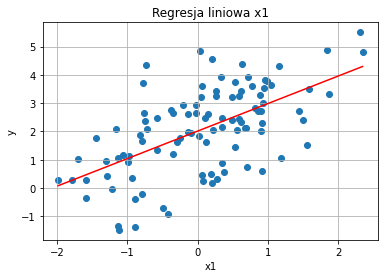

In [34]:
# y ~ a + x1
q, r = np.linalg.qr(onesx1)
beta = sp.linalg.solve_triangular(r, q.T @ y)
pred1=[min(x1), max(x1)]
y1 = beta[0] + beta[1] * pred1
plt.scatter(x1,y)
plt.plot(pred1, y1, "r")
plt.xlabel("x1")
plt.ylabel("y")
plt.title("Regresja liniowa x1")
plt.grid()
plt.show()

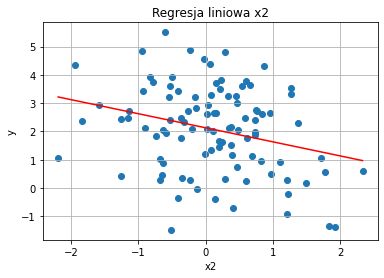

In [35]:
# y ~ a + x2
q, r = np.linalg.qr(onesx2)
beta = sp.linalg.solve_triangular(r, q.T @ y)
pred1=[min(x2), max(x2)]
y1 = beta[0] + beta[1] * pred1
plt.scatter(x2,y)
plt.plot(pred1, y1, "r")
plt.xlabel("x2")
plt.ylabel("y")
plt.title("Regresja liniowa x2")
plt.grid()
plt.show()

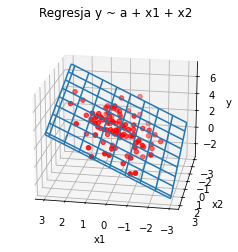

In [36]:
# y ~ a + x1 + x2

q, r = np.linalg.qr(onesx1x2)
beta = sp.linalg.solve_triangular(r, q.T @ y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = x1
Y = x2
Z = y
ax.scatter(X, Y, Z, c='r', marker="o")
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.title("Regresja y ~ a + x1 + x2")
X, Y = np.meshgrid(np.linspace(-3,3,100), np.linspace(-3,3,100))
Z = beta[0] + beta[1] * X + beta[2] * Y
ax.plot_wireframe(X, Y, Z, rstride = 12, cstride = 12)
ax.view_init(20,100)
plt.grid
plt.show()

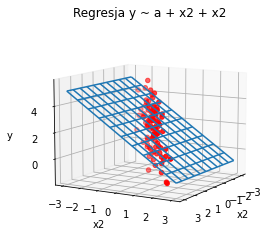

In [37]:
# y ~ a + x2 + x2

q, r = np.linalg.qr(onesx2)
beta = sp.linalg.solve_triangular(r, q.T @ y)
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
X = x2
Y = x2
Z = y
ax.scatter(X, Y, Z, c='r', marker="o")
ax.set_xlabel("x2")
ax.set_ylabel("x2")
ax.set_zlabel("y")
plt.title("Regresja y ~ a + x2 + x2")
X, Y = np.meshgrid(np.linspace(-3,3,100), np.linspace(-3,3,100))
Z = beta[0] + beta[1] * Y + beta[1] * Y
ax.plot_wireframe(X, Y, Z, rstride = 10, cstride=10)
ax.view_init(10,30)
plt.grid()
plt.show()

Na początku wygenerowano 3 wektory o zadanych parametrach za pomocą funkcji random.normal - x1, x2 oraz e. Następnie na ich podstawie wyliczono wektor y. Przy pomocy funkcji concatenate połączono wektor samych jedynek z wektorami x1, x2, oraz x1 i x2. Kolejnym krokiem było obliczenie współczynników regresji liniowych z wykorzystaniem rozkładu QR na podstawie macierzy z punktu 3. Otrzymane wyniki przedstawiono na wykresach powyżej.

Wnioski:

Ćwiczenia umożliwiły zapoznanie się z różnymi metodami rozwiązywania układów liniowych z macierzami prostokątnymi rzadkimi. Tymi metodami były: użycie funkcji square from rectan oraz solve, użycie funkcji lstsq, rozkład QR oraz rozkład SVD. Najszybszą metodą okazała się 1 wymieniona, natomiast najdokładniejszą - metoda rozkładu QR.

Materiały uzupełniające:
- [Scipy Lecture Notes](http://www.scipy-lectures.org/index.html)
- [NumPy for Matlab users](https://docs.scipy.org/doc/numpy/user/numpy-for-matlab-users.html#numpy-for-matlab-users)
- [Python Tutorial - W3Schools](https://www.w3schools.com/python/default.asp)
- [NumPy](https://www.numpy.org)
- [Matplotlib](https://matplotlib.org/)
- [Anaconda](https://www.anaconda.com/)
- [Learn Python for Data Science](https://www.datacamp.com/learn-python-with-anaconda?utm_source=Anaconda_download&utm_campaign=datacamp_training&utm_medium=banner)
- [Learn Python](https://www.learnpython.org/)
- [Wujek Google](https://google.pl) i [Ciocia Wikipedia](https://pl.wikipedia.org/wiki/Wikipedia:Strona_g%C5%82%C3%B3wna)